In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
#!ls -ltr pf*.csv

In [3]:
n_md = 120
n_ml = 1
n_aggregators = 10
fn = glob.glob("re.session*.csv")[0]
#fn1 = f'pf{n_md}{ex}.csv'
sdir = f'./'
print(fn,sdir)

re.session.lassen709.yakushin.018628.0001.csv ./


# Timing

In [4]:
pf = pd.read_csv(fn)

In [5]:
print(pf.date.max())
print(pf.date.min())
mingps = pf.gps.min()
maxgps = pf.gps.max()
print(f"mingps = {mingps}, maxgps = {maxgps}, diffgps = {maxgps - mingps}")

Thu Dec 31 23:59:59 2020
Fri Jan  1 00:00:00 2021
mingps = 1609468355, maxgps = 1609511499, diffgps = 43144


In [6]:
pf.columns

Index(['Unnamed: 0', 'label', 'start', 'gps', 'date', 'file', 'line', 'unit'], dtype='object')

In [7]:
pf[pf.label == 'simulation.step'][pf.unit == 0]

<ipython-input-7-d583be7f7cd7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pf[pf.label == 'simulation.step'][pf.unit == 0]


,Unnamed: 0,label,start,gps,date,file,line,unit
4499929,4499929,simulation.step,1,1609468376,Thu Dec 31 18:32:56 2020,openmm_simulation.py,376,0
4499930,4499930,simulation.step,-1,1609471220,Thu Dec 31 19:20:20 2020,openmm_simulation.py,379,0
4499935,4499935,simulation.step,1,1609471220,Thu Dec 31 19:20:20 2020,openmm_simulation.py,376,0
4499936,4499936,simulation.step,-1,1609471782,Thu Dec 31 19:29:42 2020,openmm_simulation.py,379,0
4499941,4499941,simulation.step,1,1609471782,Thu Dec 31 19:29:42 2020,openmm_simulation.py,376,0
...,...,...,...,...,...,...,...,...
4500337,4500337,simulation.step,1,1609509622,Fri Jan 1 06:00:22 2021,openmm_simulation.py,376,0
4500338,4500338,simulation.step,-1,1609510197,Fri Jan 1 06:09:57 2021,openmm_simulation.py,379,0
4500343,4500343,simulation.step,1,1609510197,Fri Jan 1 06:09:57 2021,openmm_simulation.py,376,0
4500344,4500344,simulation.step,-1,1609510771,Fri Jan 1 06:19:31 2021,openmm_simulation.py,379,0


In [8]:
pf[pf.label == 'simulation.step'][pf.unit == 2]

<ipython-input-8-50bdd08cfdd7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pf[pf.label == 'simulation.step'][pf.unit == 2]


,Unnamed: 0,label,start,gps,date,file,line,unit
9011145,9011145,simulation.step,1,1609468377,Thu Dec 31 18:32:57 2020,openmm_simulation.py,376,2
9011146,9011146,simulation.step,-1,1609471323,Thu Dec 31 19:22:03 2020,openmm_simulation.py,379,2
9011151,9011151,simulation.step,1,1609471323,Thu Dec 31 19:22:03 2020,openmm_simulation.py,376,2
9011152,9011152,simulation.step,-1,1609471909,Thu Dec 31 19:31:49 2020,openmm_simulation.py,379,2
9011157,9011157,simulation.step,1,1609471909,Thu Dec 31 19:31:49 2020,openmm_simulation.py,376,2
...,...,...,...,...,...,...,...,...
9011547,9011547,simulation.step,1,1609509877,Fri Jan 1 06:04:37 2021,openmm_simulation.py,376,2
9011548,9011548,simulation.step,-1,1609510460,Fri Jan 1 06:14:20 2021,openmm_simulation.py,379,2
9011553,9011553,simulation.step,1,1609510460,Fri Jan 1 06:14:20 2021,openmm_simulation.py,376,2
9011554,9011554,simulation.step,-1,1609511047,Fri Jan 1 06:24:07 2021,openmm_simulation.py,379,2


In [9]:
pf.label.unique()

array(['prepare', 'lock4', 'find_best_pdb', 'openmm_simulate',
       'pre_simulation', 'simulation.big', 'simulation.step',
       'prepare_init', 'aggregator_iteration', 'aggregator_wait1',
       'aggregator_wait2', 'aggregator_internal_loop', 'aggregator_read',
       'aggregator_write', 'aggregator_kill', 'cvae_iteration',
       'outlier_search', 'outlier_predict', 'outlier_eps', 'outlier_pdb',
       'outlier_rmsd'], dtype=object)

In [10]:
pfu = {}
pfd = {}

for u in pf['unit'].unique():
    #print(f'u={u}')
    tmp = pf[pf.unit == u].reset_index()
    pfu[u] = {}
    pfd[u] = {}
    for l in tmp.label.unique():
        pfu[u][l] = tmp[tmp.label == l].reset_index()
        starts = []
        ends = []
        durations = []
        diffs = []
        units = []
        labels = []
        for i in range(0,len(pfu[u][l])//2*2 - 2,2):
            start = pfu[u][l].gps[i]
            end = pfu[u][l].gps[i+1]
            start1 = pfu[u][l].gps[i+2]
            duration = end - start
            diff = start1 - start
            unit = pfu[u][l].unit[i]
            label = pfu[u][l].label[i]
            starts.append(start)
            ends.append(end)
            durations.append(duration)
            diffs.append(diff)
            units.append(unit)
            labels.append(label)
        pfd[u][l] = pd.DataFrame(columns=["start","end","duration","d","unit","label"])
        pfd[u][l].start = starts
        pfd[u][l].end = ends
        pfd[u][l].duration = durations
        pfd[u][l].d = diffs
        pfd[u][l].unit = units
        pfd[u][l].label = labels

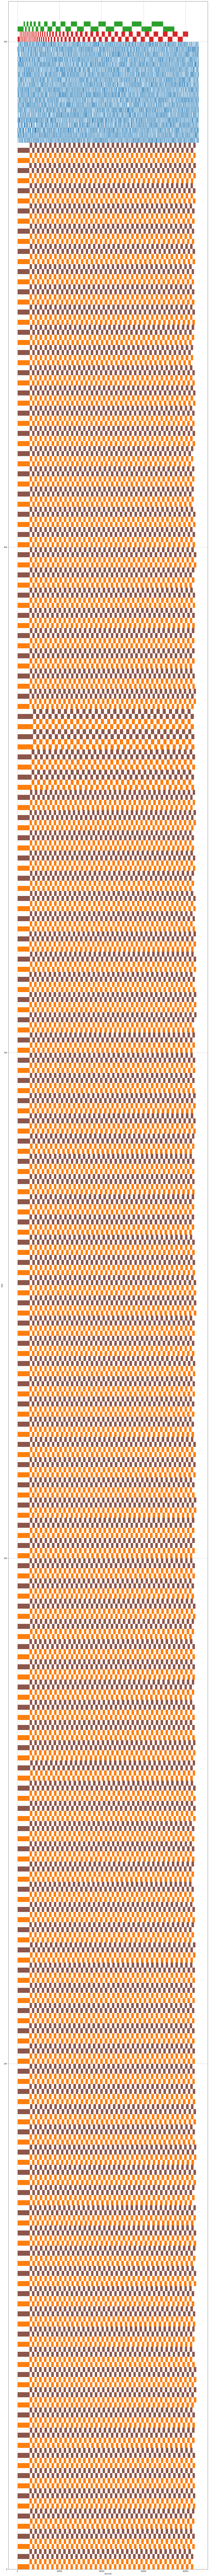

In [11]:
nnn=n_md
offset=0

import matplotlib.pyplot as plt 
fig, gnt = plt.subplots(figsize=(20, 2*(1 + nnn + n_ml + n_aggregators)) )

gnt.set_xlabel('seconds') 
gnt.set_ylabel('task')

gnt.set_ylim([0, 4*(1 + n_ml +nnn + n_aggregators)-20])

gnt.grid(True)

pfd[0+offset]['simulation.step'].start

sh = 0
h=1


for i in range(offset,nnn+offset):
    z = pfd[i]['simulation.step']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'), label="niterations of the simulation")

    sh += h    
    
    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'))

    sh += h
        
    z = pfd[i]['simulation.big']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'), label="simulation")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'))

    sh += h
    
for i in range(n_aggregators):
    z = pfd[n_md+i+offset]['aggregator_internal_loop']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue', label="aggregator")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue')

    sh += h


for i in range(n_ml):
    z = pfd[n_md+n_aggregators+i+offset]['cvae_iteration']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red', label="CVAE training")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red')

    sh += h

z = pfd[n_md+n_ml + n_aggregators+offset]['outlier_search']
zz = list(zip(z.start - pf.gps.min(), z.duration))

zz1 = zz[0:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green', label="Outlier search")

sh += h

zz1 = zz[1:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green')

# gnt.legend()

plt.savefig("gantt2.png")

Text(0.5, 0, 'duration, seconds')

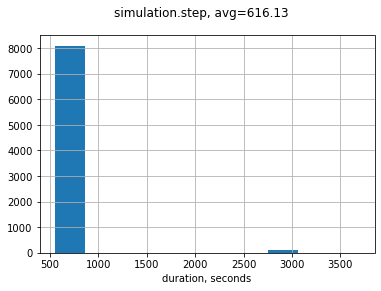

In [12]:
label = 'simulation.step'
merged_simulation_step = pfd[0+offset][label].copy()
for u in range(1+offset,n_md+offset):
    merged_simulation_step = merged_simulation_step.append(pfd[u][label])
fig, axs = plt.subplots(1,1)
merged_simulation_step['duration'].hist()
fig.suptitle(f"{label}, avg={merged_simulation_step.duration.mean():.2f}")
axs.set_xlabel("duration, seconds")

In [13]:
merged_simulation_step.describe()

,start,end,duration,d,unit
count,8.216000e+03,8.216000e+03,8216.000000,8216.000000,8216.000000
mean,1.609490e+09,1.609491e+09,616.126339,616.426728,59.294912
std,1.157435e+04,1.151349e+04,279.923648,279.919478,34.677420
min,1.609468e+09,1.609471e+09,550.000000,550.000000,0.000000
25%,1.609480e+09,1.609481e+09,576.000000,576.000000,29.000000
50%,1.609490e+09,1.609491e+09,579.000000,579.000000,59.000000
75%,1.609500e+09,1.609501e+09,583.000000,583.000000,89.000000
max,1.609510e+09,1.609511e+09,3697.000000,3698.000000,119.000000


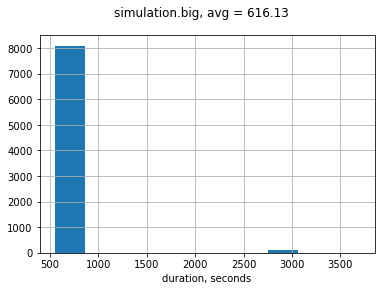

In [14]:
label = 'simulation.big'
merged_simulation_big = pfd[0+offset][label].copy()
for u in range(1+offset,n_md+offset):
    merged_simulation_big = merged_simulation_big.append(pfd[u][label])
fig, axs = plt.subplots(1,1)
merged_simulation_big['duration'].hist()
fig.suptitle(f"{label}, avg = {merged_simulation_big.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

In [15]:
merged_simulation_big.describe()

,start,end,duration,d,unit
count,8.217000e+03,8.217000e+03,8217.000000,8217.000000,8217.000000
mean,1.609490e+09,1.609491e+09,616.126567,616.422417,59.296945
std,1.157577e+04,1.151491e+04,279.907406,279.902720,34.675800
min,1.609468e+09,1.609471e+09,550.000000,550.000000,0.000000
25%,1.609480e+09,1.609481e+09,576.000000,576.000000,29.000000
50%,1.609490e+09,1.609491e+09,579.000000,579.000000,59.000000
75%,1.609500e+09,1.609501e+09,583.000000,583.000000,89.000000
max,1.609510e+09,1.609511e+09,3697.000000,3698.000000,119.000000


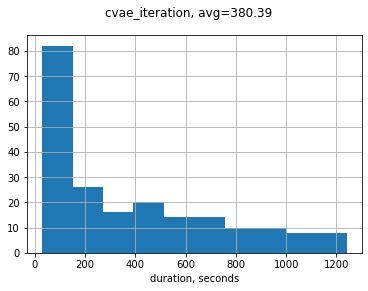

In [16]:
label = 'cvae_iteration'
merged_cvae_iteration = pfd[n_md+n_aggregators+offset][label].copy()
for u in range(n_md+n_aggregators+offset, n_md+n_aggregators+n_ml+offset):
    merged_cvae_iteration = merged_cvae_iteration.append(pfd[u][label])
fig, axs = plt.subplots(1,1)
merged_cvae_iteration.duration.hist()
fig.suptitle(f"{label}, avg={merged_cvae_iteration.duration.mean():.2f}")
axs.set_xlabel(f"duration, seconds");

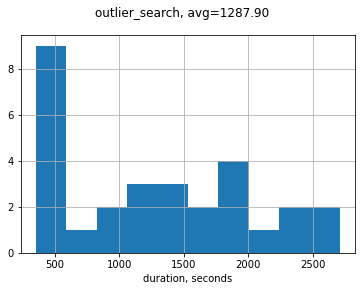

In [17]:
label = 'outlier_search'
merged_outlier_search = pfd[n_md+n_ml+n_aggregators+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_outlier_search.duration.hist()
fig.suptitle(f"{label}, avg={merged_outlier_search.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

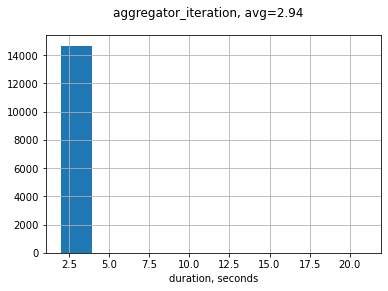

In [18]:
label = 'aggregator_iteration'
merged_aggregator_iteration = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_iteration.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_iteration.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

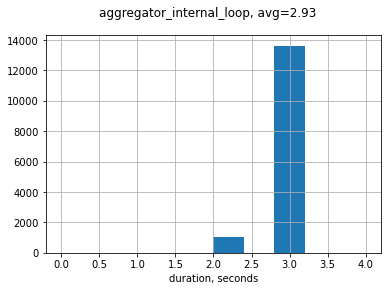

In [19]:
label = 'aggregator_internal_loop'
merged_aggregator_internal_loop = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_internal_loop.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_internal_loop.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

In [20]:
label = 'lock_wait'
merged_lock_wait = pfd[0+offset][label].copy()
for u in range(1+offset,n_md+offset):
    try:
        merged_lock_wait = merged_lock_wait.append(pfd[u][label])
    except:
        pass
fig, axs = plt.subplots(1,1)
merged_lock_wait.duration.hist()
fig.suptitle(f"{label}, avg={merged_lock_wait.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

KeyError: 'lock_wait'

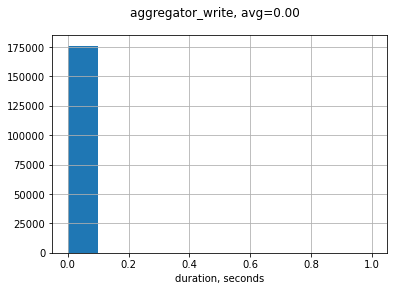

In [21]:
label = 'aggregator_write'
merged_aggregator_write = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_write.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_write.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

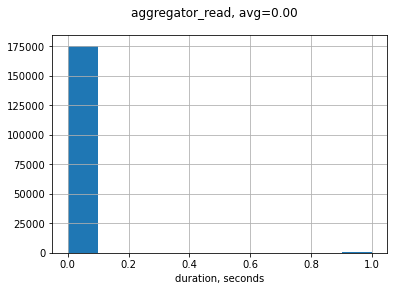

In [22]:
label = 'aggregator_read'
merged_aggregator_read = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_read.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_read.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

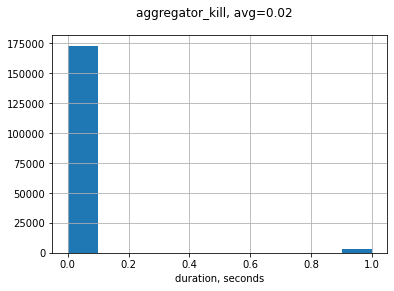

In [23]:
label = 'aggregator_kill'
merged_aggregator_kill = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_kill.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_kill.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

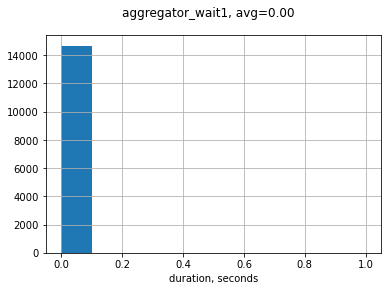

In [24]:
label = 'aggregator_wait1'
merged_aggregator_wait1 = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_wait1.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_wait1.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

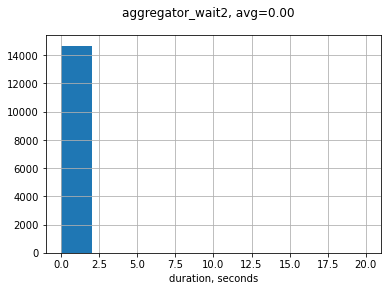

In [25]:
label = 'aggregator_wait2'
merged_aggregator_wait2 = pfd[n_md+offset][label].copy()
fig, axs = plt.subplots(1,1)
merged_aggregator_wait2.duration.hist()
fig.suptitle(f"{label}, avg={merged_aggregator_wait2.duration.mean():.2f}")
axs.set_xlabel("duration, seconds");

# Convergence

===== i=0 ======
         Unnamed: 0         fstep           step              R
count  176100.00000  176100.00000  176100.000000  176100.000000
mean    88049.50000   88049.50000    7337.000011       5.573498
std     50835.83554   50835.83554    4236.319638       0.966822
min         0.00000       0.00000       0.000000       3.815123
25%     44024.75000   44024.75000    3668.000000       5.016474
50%     88049.50000   88049.50000    7337.000000       5.266244
75%    132074.25000  132074.25000   11006.000000       5.675149
max    176099.00000  176099.00000   14675.000000       9.694231
===== i=1 ======
          Unnamed: 0          fstep           step              R
count  176300.000000  176300.000000  176300.000000  176300.000000
mean    88149.500000   88149.500000    7345.333347       5.577138
std     50893.570566   50893.570566    4241.130894       0.963457
min         0.000000       0.000000       0.000000       3.888537
25%     44074.750000   44074.750000    3672.000000       5.0

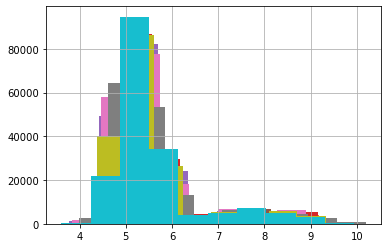

In [26]:
pf1 = []
for i in range(n_aggregators):
    pf1.append(pd.read_csv(f"{sdir}/aggregator{i}.csv"))

for i in range(n_aggregators):
    pf1[i].R.hist()
    
for i in range(n_aggregators):
    print(f"===== i={i} ======")
    print(pf1[i].describe())

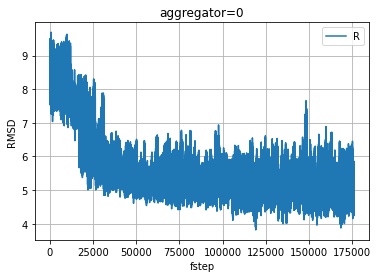

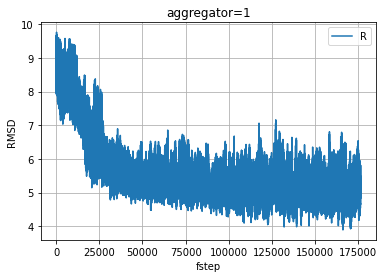

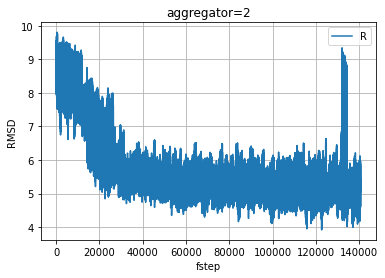

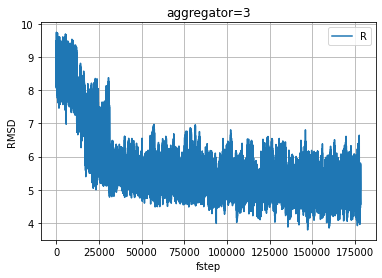

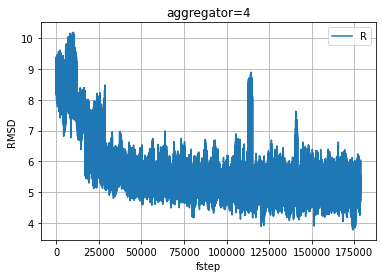

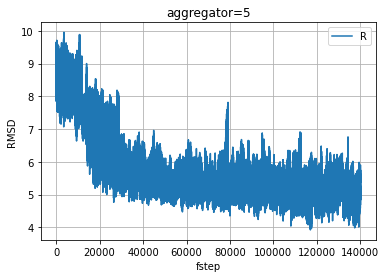

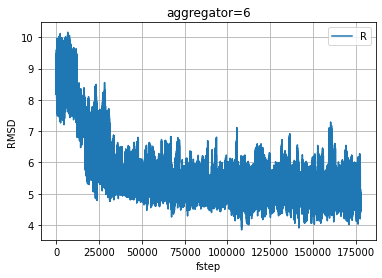

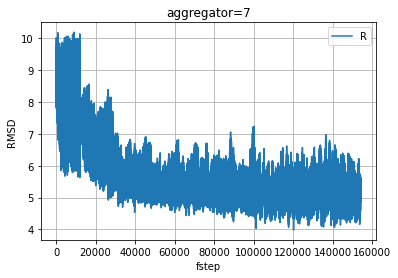

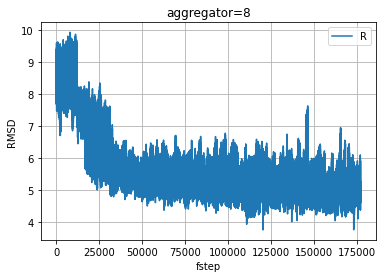

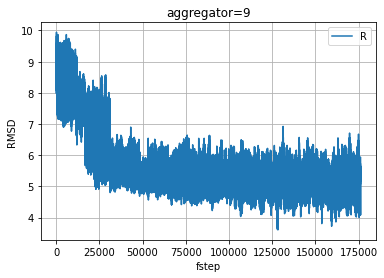

In [27]:
for i in range(n_aggregators):
    pf1[i].plot(x='fstep',y='R', grid=True, title = f'aggregator={i}', ylabel='RMSD')

In [28]:
def myaverage(R, window, step=1):
    averaged = []
    for i in range(0,len(R)-window, step):
        averaged.append(sum(R[i:i+window])/window)
    return averaged

In [29]:
def mymin(R, window, step=1):
    mins = []
    for i in range(0,len(R)-window, step):
        mins.append(min(R[i:i+window]))
    return mins

In [30]:
def mymax(R, window, step=1):
    maxs = []
    for i in range(0,len(R)-window, step):
        maxs.append(max(R[i:i+window]))
    return maxs

In [31]:
def mysmoothed(R, window=100, step=1):
    aRs = myaverage(R, window, step)
    mRs = mymin(R, window, step)
    xRs = mymax(R, window, step)
    smoothedR = pd.DataFrame(columns=['raverage','rmin', 'rmax'])
    smoothedR.raverage=aRs
    smoothedR.rmin=mRs
    smoothedR.rmax=xRs
 
    smoothedR.raverage.plot(grid=True, figsize=(20,10))
    smoothedR.rmin.plot(grid=True, figsize=(20,10))
    smoothedR.rmax.plot(grid=True, figsize=(20,10))
    
    return smoothedR

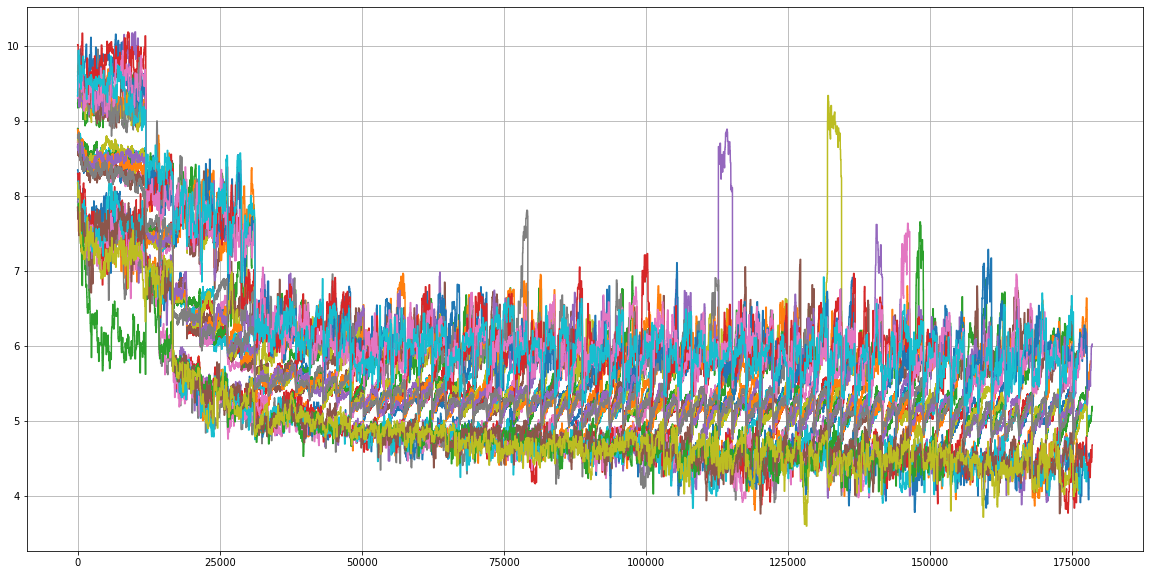

In [32]:
for i in range(n_aggregators):
    smoothedR = mysmoothed(pf1[i].R.tolist(), 100, 1)
 

In [33]:
csv_fns = glob.glob(f"{sdir}/outlier*.csv")

In [34]:
frames = []

In [35]:
for csv_fn in csv_fns:
    df = pd.read_csv(csv_fn, names=['md5','RMSD'], header=0)
    frames.append(df)

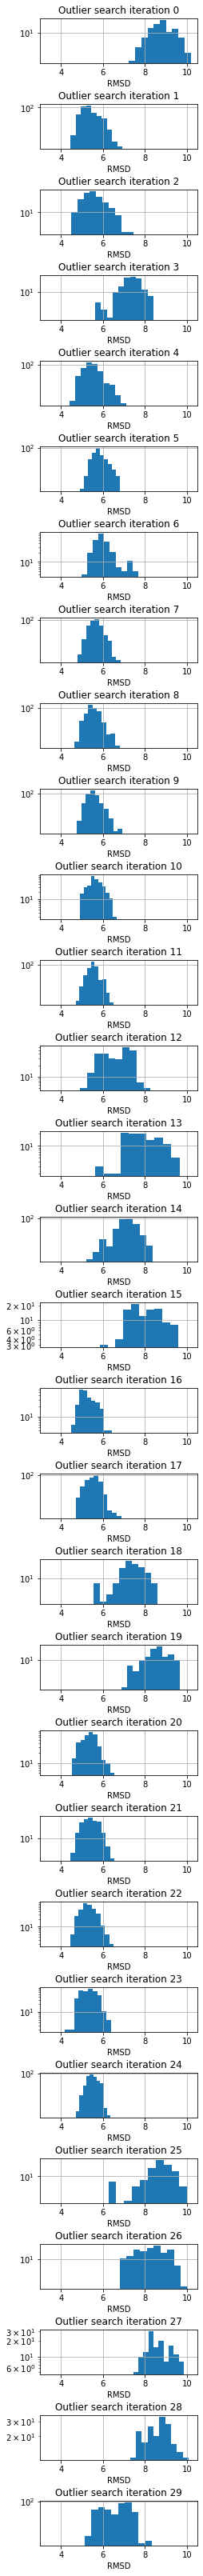

In [39]:
fig, axes = plt.subplots(nrows=len(frames), ncols=1, figsize=(4, 45))
fig.tight_layout(pad=3)
i = 0
for fr in frames:
    fr.RMSD.hist(ax=axes[i],log=True); axes[i].set_xlim([3,10.5]); axes[i].set_xlabel('RMSD'); 
    axes[i].set_title(f"Outlier search iteration {i}"); 
    i += 1

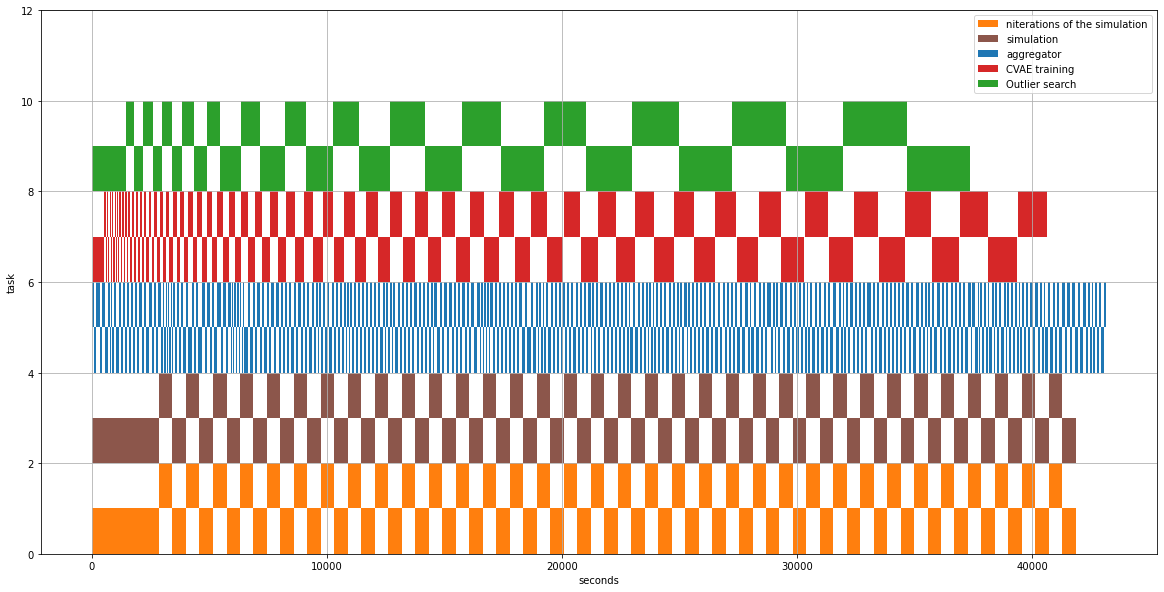

In [37]:
nnn=n_md
offset=0

import matplotlib.pyplot as plt 
fig, gnt = plt.subplots(figsize=(20, 10)) 

gnt.set_xlabel('seconds') 
gnt.set_ylabel('task')

gnt.set_ylim([0, 12])

gnt.grid(True)

pfd[0+offset]['simulation.step'].start

sh = 0
h=1


for i in range(offset,offset+1):
    z = pfd[i]['simulation.step']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'), label="niterations of the simulation")

    sh += h    
    
    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'))

    sh += h
        
    z = pfd[i]['simulation.big']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'), label="simulation")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:brown'))

    sh += h
    
for i in range(1):
    z = pfd[n_md+i+offset]['aggregator_internal_loop']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue', label="aggregator")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue')

    sh += h


for i in range(1):
    z = pfd[n_md+n_aggregators+i+offset]['cvae_iteration']
    zz = list(zip(z.start - pf.gps.min(), z.duration))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red', label="CVAE training")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red')

    sh += h

z = pfd[n_md + n_aggregators + n_ml +offset]['outlier_search']
zz = list(zip(z.start - pf.gps.min(), z.duration))

zz1 = zz[0:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green', label="Outlier search")

sh += h

zz1 = zz[1:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green')

gnt.legend()

plt.savefig("gantt2.png")